In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate fracional Brownian motion using Cholevsky decomposition

Cholevsky method:
* calculate covariance matrix $\Sigma$ for our process or increments (what we want or have)
* do a Cholevsky decomposition $A$ (lower triangular matrix) such that $\Sigma = A \cdot A^T$
* multiply $A$ by i.i.d. normal vector $Z_i \sim N(0, 1)$

In [13]:
def cholesky_fbm(H, n):
    sigma = np.zeros((n, n))
    for s in range(1, n+1):
        for t in range(s, n+1):
            gamma = (s**(2*H) + t**(2*H) - (t-s)**(2*H)) / 2
            sigma[s-1][t-1] = gamma
            sigma[t-1][s-1] = gamma
    A = np.linalg.cholesky(sigma)
    Z = np.random.normal(0, 1, n)
    fbm = np.dot(A, Z.reshape(-1,1))
    return np.transpose(fbm)[0]

In [14]:
H = [0.3, 0.5, 0.7]
n = 2**10
N = 25

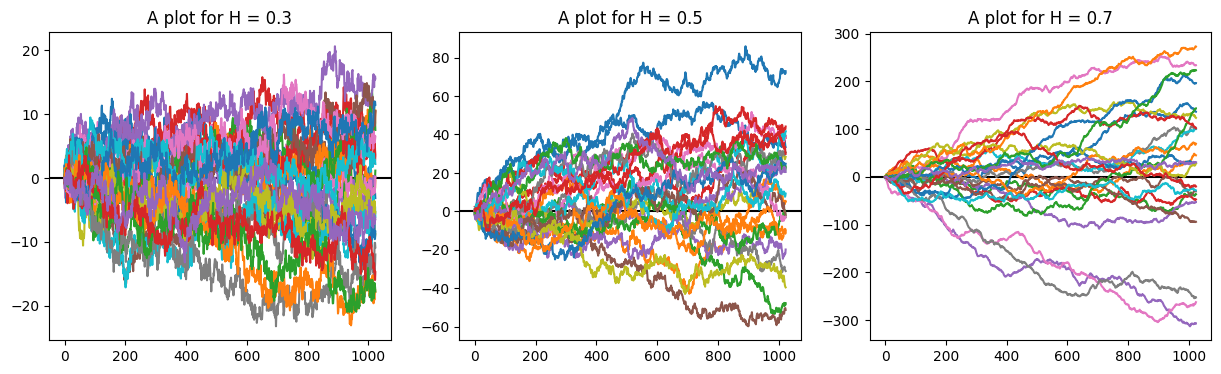

In [15]:
all_fbm = []
t = list(range(n))
fig, axs = plt.subplots(1, 3, figsize = (15, 4))
for i, h in enumerate(H):
    fbm = [cholesky_fbm(h, n) for _ in range(N)]
    # plt.plot(t, np.transpose(fbm))
    axs[i].axhline(0, color = 'black')
    axs[i].plot(t, np.transpose(fbm))
    axs[i].set_title(f'A plot for H = {h}')
plt.show()